<a href="https://colab.research.google.com/github/aamerS/Machine-learning/blob/master/LogitTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/titanic_train.csv')
test=pd.read_csv('/content/titanic_test.csv')
copy=pd.read_csv('/content/titanic_test.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import seaborn as sns

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df=df.drop(['PassengerId','Cabin','Ticket','Name','Embarked'],axis=1)
test=test.drop(['PassengerId','Cabin','Ticket','Name','Embarked'],axis=1)


In [ ]:
test.isna().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
X=df.drop('Survived',axis=1)

In [ ]:
y=df['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [ ]:
X['Age'].fillna(value=X['Age'].mean(),inplace=True)
test['Age'].fillna(value=test['Age'].mean(),inplace=True)


In [ ]:
test['Fare'].fillna(value=test['Fare'].mean(),inplace=True)

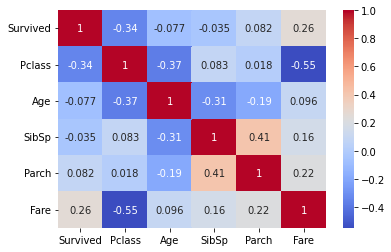

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
#sns.boxplot(X,y)

In [ ]:
X.shape

(891, 6)

In [ ]:
X['Gender_Male']=X.Sex.map({'female':0,'male':1})

In [ ]:
test['Gender_Male']=test.Sex.map({'female':0,'male':1})

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Gender_Male
0,3,male,22.0,1,0,7.2500,1
1,1,female,38.0,1,0,71.2833,0
2,3,female,26.0,0,0,7.9250,0
3,1,female,35.0,1,0,53.1000,0
4,3,male,35.0,0,0,8.0500,1


In [ ]:
X=X.drop('Sex',axis=1)
test=test.drop('Sex',axis=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


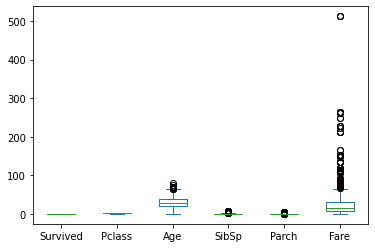

In [ ]:
df.plot(kind='box')

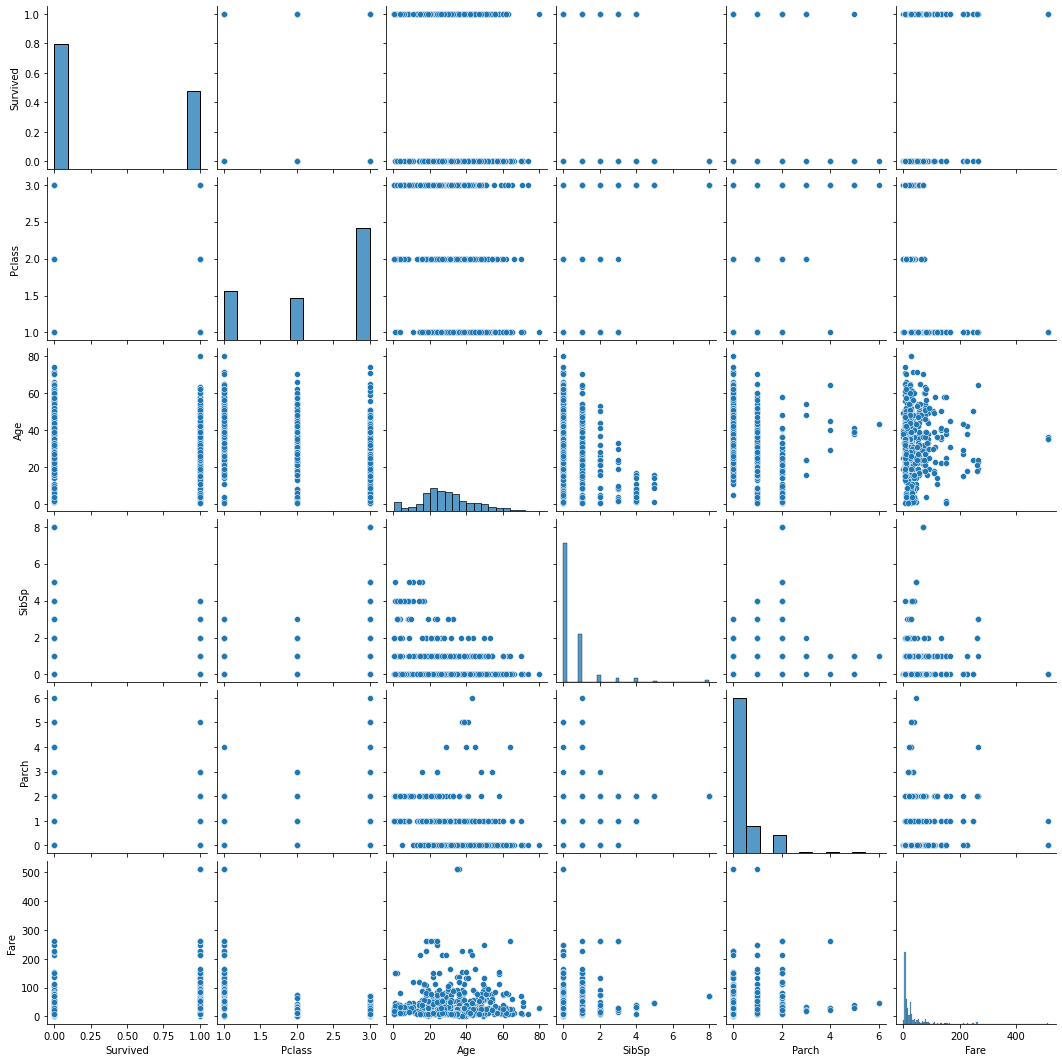

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit=LogisticRegression()

In [ ]:
logit.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logit.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.7873134328358209

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       170
           1       0.70      0.73      0.72        98

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
test.isna().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender_Male    0
dtype: int64

In [ ]:
submission_pred=logit.predict(test)

In [ ]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_Male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [ ]:
copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
final=pd.DataFrame({'PassengerId':copy.PassengerId.values, 'Survived':submission_pred})

In [ ]:
final.to_csv('submission.csv',index=False)